In [2]:
from function_ei import (
    generate_random_graph,
    random_probability_vector,
    simulate_many_runs,
    simulate_many_runs_degree
)

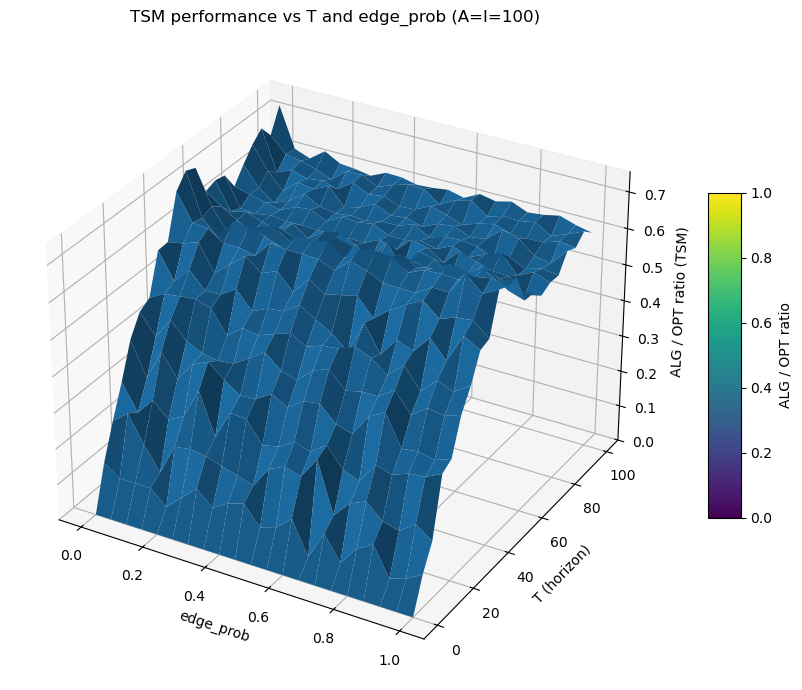

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 仅用于注册 3D projection

A_size = 100
I_size = 100

# T 从 0 到 100（步长你可以改成 1，但会很慢，这里用 5 先看形状）
Ts = np.arange(0, 101, 5)            # 0, 5, 10, ..., 100
edge_probs = np.linspace(0, 1, 21)   # 0, 0.05, ..., 1

num_graphs_per_cell = 5   # 每个 (T, edge_prob) 下随机图数量
runs_per_graph = 3        # 每张图重复次数

# 生成网格：T 维度 × edge_prob 维度
T_grid, EP_grid = np.meshgrid(Ts, edge_probs, indexing='ij')  # 形状都是 (len(Ts), len(edge_probs))
Z = np.zeros_like(T_grid, dtype=float)  # 存 ALG/OPT ratio

for i_T, T in enumerate(Ts):
    for j_ep, edge_prob in enumerate(edge_probs):

        if T == 0:
            # T = 0 时没有 arrival，ratio 定成 0
            Z[i_T, j_ep] = 0.0
            continue

        ratios = []
        for _ in range(num_graphs_per_cell):
            neighbors = generate_random_graph(A_size, I_size, edge_prob)
            p = random_probability_vector(I_size)

            avg_ratio_tsm, _ = simulate_many_runs(
                A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
            )
            ratios.append(avg_ratio_tsm)

        Z[i_T, j_ep] = np.mean(ratios)

# ========== 3D Plot ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# X: edge_prob, Y: T, Z: ALG/OPT
surf = ax.plot_surface(EP_grid, T_grid, Z,
                    rstride=1, cstride=1,
                    linewidth=0, antialiased=True)

ax.set_xlabel("edge_prob")
ax.set_ylabel("T (horizon)")
ax.set_zlabel("ALG / OPT ratio (TSM)")
ax.set_title("TSM performance vs T and edge_prob (A=I=100)")

ax.set_zlim(bottom=0)  # 让 z 轴从 0 开始

fig.colorbar(surf, shrink=0.5, aspect=10, label="ALG / OPT ratio")
plt.tight_layout()
plt.show()


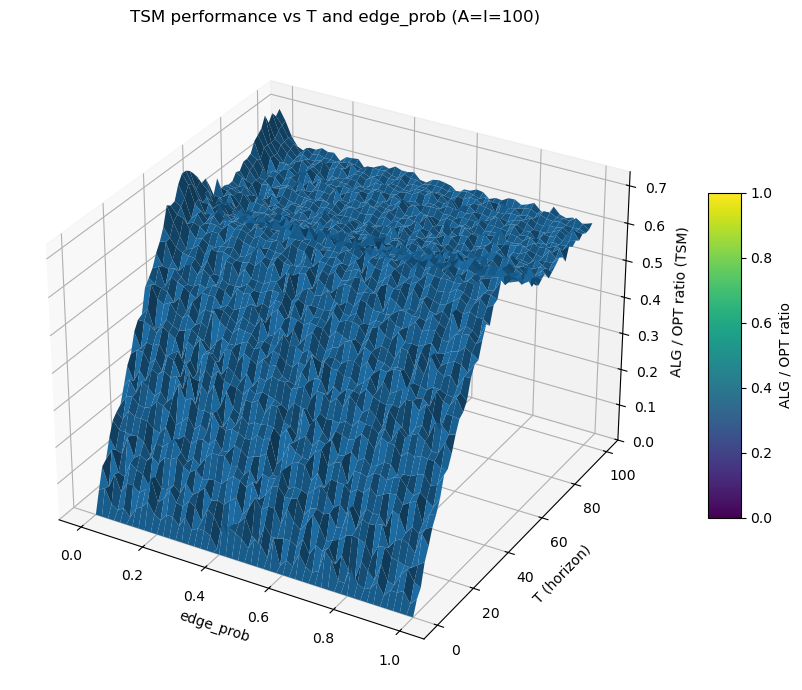

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 仅用于注册 3D projection

A_size = 100
I_size = 100

# T 从 0 到 100（步长你可以改成 1，但会很慢，这里用 5 先看形状）
Ts = np.arange(0, 101, 2)            # 0, 5, 10, ..., 100
edge_probs = np.linspace(0, 1, 51)   

num_graphs_per_cell = 10   # 每个 (T, edge_prob) 下随机图数量
runs_per_graph = 5        # 每张图重复次数

# 生成网格：T 维度 × edge_prob 维度
T_grid, EP_grid = np.meshgrid(Ts, edge_probs, indexing='ij')  # 形状都是 (len(Ts), len(edge_probs))
Z = np.zeros_like(T_grid, dtype=float)  # 存 ALG/OPT ratio

for i_T, T in enumerate(Ts):
    for j_ep, edge_prob in enumerate(edge_probs):

        if T == 0:
            # T = 0 时没有 arrival，ratio 定成 0
            Z[i_T, j_ep] = 0.0
            continue

        ratios = []
        for _ in range(num_graphs_per_cell):
            neighbors = generate_random_graph(A_size, I_size, edge_prob)
            p = random_probability_vector(I_size)

            avg_ratio_tsm, _ = simulate_many_runs(
                A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
            )
            ratios.append(avg_ratio_tsm)

        Z[i_T, j_ep] = np.mean(ratios)

# ========== 3D Plot ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# X: edge_prob, Y: T, Z: ALG/OPT
surf = ax.plot_surface(EP_grid, T_grid, Z,
                    rstride=1, cstride=1,
                    linewidth=0, antialiased=True)

ax.set_xlabel("edge_prob")
ax.set_ylabel("T (horizon)")
ax.set_zlabel("ALG / OPT ratio (TSM)")
ax.set_title("TSM performance vs T and edge_prob (A=I=100)")

ax.set_zlim(bottom=0)  # 让 z 轴从 0 开始

fig.colorbar(surf, shrink=0.5, aspect=10, label="ALG / OPT ratio")
plt.tight_layout()
plt.show()


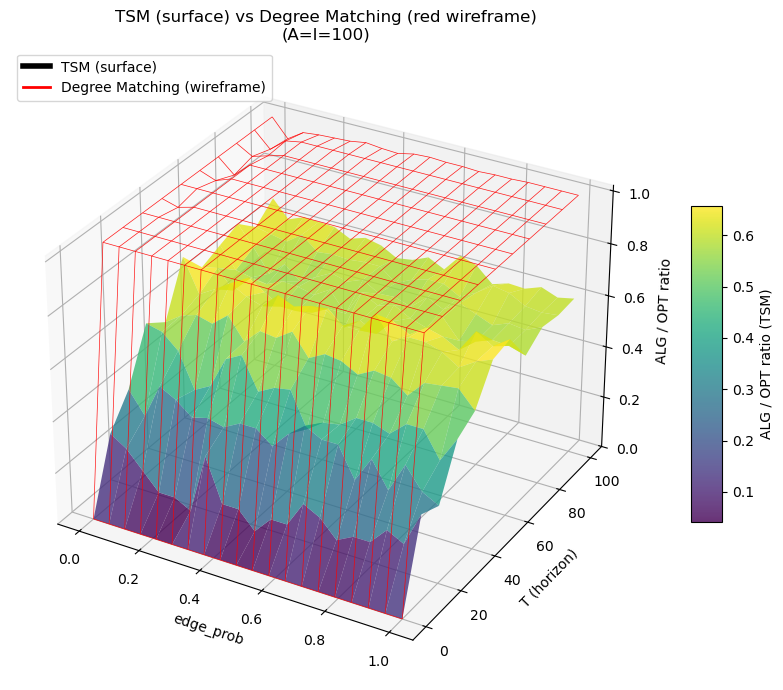

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 注册 3D projection

A_size = 100
I_size = 100

Ts = np.arange(0, 101, 10)            # 0, 2, 4, ..., 100
edge_probs = np.linspace(0, 1, 20)   # 0, 0.02, ..., 1

num_graphs_per_cell = 3  # 每个 (T, edge_prob)
runs_per_graph = 1       # 每张图重复次数

# 生成网格
T_grid, EP_grid = np.meshgrid(Ts, edge_probs, indexing='ij')
Z_tsm = np.zeros_like(T_grid, dtype=float)   # TSM 的 ALG/OPT
Z_deg = np.zeros_like(T_grid, dtype=float)   # Degree matching 的 ALG/OPT

for i_T, T in enumerate(Ts):
    for j_ep, edge_prob in enumerate(edge_probs):

        if T == 0:
            Z_tsm[i_T, j_ep] = 0.0
            Z_deg[i_T, j_ep] = 0.0
            continue

        ratios_tsm = []
        ratios_deg = []

        for _ in range(num_graphs_per_cell):
            neighbors = generate_random_graph(A_size, I_size, edge_prob)
            p = random_probability_vector(I_size)

            # -------- TSM --------
            avg_ratio_tsm, _ = simulate_many_runs(
                A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
            )
            ratios_tsm.append(avg_ratio_tsm)

            # -------- Degree Matching --------
            avg_ratio_deg, _ = simulate_many_runs_degree(
                A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
            )
            ratios_deg.append(avg_ratio_deg)

        Z_tsm[i_T, j_ep] = np.mean(ratios_tsm)
        Z_deg[i_T, j_ep] = np.mean(ratios_deg)

# ========== 3D Plot ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# TSM：surface
surf_tsm = ax.plot_surface(
    EP_grid, T_grid, Z_tsm,
    rstride=1, cstride=1,
    linewidth=0, antialiased=True,
    alpha=0.8, cmap="viridis"
)

# Degree matching：wireframe 叠在同一张图上
wire_deg = ax.plot_wireframe(
    EP_grid, T_grid, Z_deg,
    color='r', linewidth=0.5, alpha=0.9
)

ax.set_xlabel("edge_prob")
ax.set_ylabel("T (horizon)")
ax.set_zlabel("ALG / OPT ratio")
ax.set_title("TSM (surface) vs Degree Matching (red wireframe)\n(A=I=100)")

ax.set_zlim(bottom=0)

# 只给 TSM 上色条
fig.colorbar(surf_tsm, shrink=0.5, aspect=10, label="ALG / OPT ratio (TSM)")

# 手动加 legend
tsm_proxy, = ax.plot([], [], [], color='k', linewidth=4, label='TSM (surface)')
deg_proxy, = ax.plot([], [], [], color='r', linewidth=2, label='Degree Matching (wireframe)')
ax.legend(handles=[tsm_proxy, deg_proxy], loc='upper left')

plt.tight_layout()
plt.show()
